## Convert to `txt` file

In [2]:
import cv2
import numpy as np
from PIL import Image

height = 100
width  = 200
dim    = 3

def resize_image(input_path):
    with Image.open(input_path) as img:
        resized_img = img.resize((width, height))
        resized_img = np.array(resized_img)
        r_channel = resized_img[:, :, 0].flatten() 
        g_channel = resized_img[:, :, 1].flatten()
        b_channel = resized_img[:, :, 2].flatten()

        text = np.concatenate((r_channel, g_channel, b_channel))


    with open('image.txt', 'w') as file:
        file.write(f"{height} {width} {dim}\n")

        file.write(' '.join(map(str, r_channel)) + '\n')
    
        file.write(' '.join(map(str, g_channel)) + '\n')

        file.write(' '.join(map(str, b_channel)) + '\n')

# Example usage
input_path = 'image.jpg'
resize_image(input_path)

In [3]:
with open('image.txt', 'r') as file:
    lines = file.readlines()

height, width, dimension = map(int, lines[0].strip().split())

r_channel = list(map(int, lines[1].strip().split()))
g_channel = list(map(int, lines[2].strip().split()))
b_channel = list(map(int, lines[3].strip().split()))


if dimension == 1:
    image = np.array(r_channel).reshape((height, width))
    grayscale_image = Image.fromarray(image.astype('uint8'), 'L')
    grayscale_image.save('image.jpg')
    grayscale_image.show()

else:
    red_channel   = np.array(r_channel).reshape((height, width))
    green_channel = np.array(g_channel).reshape((height, width))
    blue_channel  = np.array(b_channel).reshape((height, width))
    rgb_image     = np.stack((red_channel, green_channel, blue_channel), axis=-1)

    rgb_image = Image.fromarray(rgb_image.astype('uint8'), 'RGB')
    rgb_image.save('output.jpg')
    rgb_image.show()

## Output

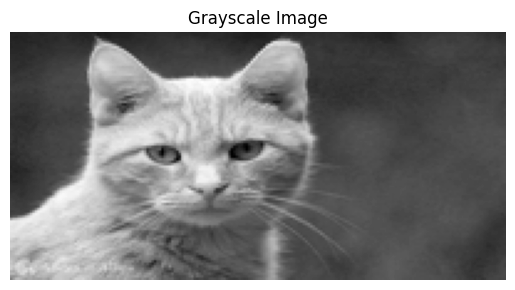

In [4]:
import matplotlib.pyplot as plt

with open('output.txt', 'r') as file:
    lines = file.readlines()

height, width, dimension = map(int, lines[0].strip().split())
image_data = list(map(int, lines[1].strip().split()))

if dimension == 1:
    image = np.array(image_data).reshape((height, width))
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.savefig('output.jpg', bbox_inches='tight', pad_inches=0)
    plt.show()

else:
    red_channel   = np.array(image_data[:height * width]).reshape((height, width))
    green_channel = np.array(image_data[height * width : 2 * height * width]).reshape((height, width))
    blue_channel  = np.array(image_data[2 * height * width:]).reshape((height, width))
    rgb_image     = np.stack((red_channel, green_channel, blue_channel), axis=-1)
    plt.imshow(rgb_image)
    plt.title('RGB Image')
    plt.axis('off')
    plt.savefig('output.jpg', bbox_inches='tight', pad_inches=0)
    plt.show()
